# Logistic Regression for Prostate Cancer

# 1. Introduction 

* Logistic Regression: Abnormal or Normal 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools 

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style = 'white', context = 'notebook', palette = 'deep') 

import os 

Using TensorFlow backend.


In [20]:
df = pd.read_csv('./input/Prostate_Cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [32]:
df.diagnosis_result = [1 if each == 'M' else 0 for each in df.diagnosis_result]

y = df.diagnosis_result.values 
x_data = df.drop(columns = 'diagnosis_result', axis = 1)

# normalization 
x = (x_data - np.min(x_data)) /  (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [22]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T 

In [23]:
def initialize_weights_and_bias(dimension): 
    w = np.full((dimension, 1), 0.01) # fill w with 0.01
    b = 0.0
    return w, b 

In [24]:
def sigmoid(z) :
    y_head = 1 / (1+ np.exp(-z))
    return y_head

In [25]:
def forward_backward_propagation(w,b,x_train, y_train):
    #forward
    y_head = sigmoid(np.dot(w.T, x_train) + b)
    
    loss = -(y_train * np.log(y_head) + (1-y_train)*np.log(1-y_head)) #cross entropy
    cost = np.sum(loss) / x_train.shape[1]
    
    #back
    derivative_weight = np.dot(x_train, ((y_head-y_train).T))/x_train.shape[1]
    
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    
    gradients = {"derivative_weight" : derivative_weight,
                 "derivative_bias" : derivative_bias}
    
    return cost, gradients

In [26]:
def update_weight_and_bias(w,b,x_train, y_train, lr, iteration_num):
    cost_list = []
    index = []
    
    for i in range(iteration_num):
        cost, gradients = forward_backward_propagation(w,b,x_train, y_train)
        w = w - lr * gradients["derivative_weight"]
        b = b - lr * gradients["derivative_bias"]
        
        cost_list.append(cost)
        index.append(i)
        
    params = {"weight" : w, "bias": b}
    
    print("iteration num: ", iteration_num)
    print("cost: ", cost)
    
    plt.plot(index,cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()

    return params, gradients

In [27]:
def predict(w,b,x_test):
    z = np.dot(w.T, x_test) + b
    y_pred_head = sigmoid(z)
    
    y_pred = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_pred_head.shape[1]) : 
        if y_pred_head[0,i] <= 0.5:
            y_pred[0,i] = 0 # false 
        else:
            y_pred[0,i] = 1 # true
            
    return y_pred

In [28]:
def logistic_regression(x_train, y_train, x_test, y_test, lr, iteration_num):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension) 
    
    params, grads = update_weight_and_bias(w,b,x_train, y_train, lr, iteration_num)
    y_pred = predict(params["weight"], params["bias"], x_test)
    
    print("manual test accuracy:", (100 - np.mean(np.abs(y_pred - y_test)) * 100) / 100)

iteration num:  100
cost:  0.37732447604144115


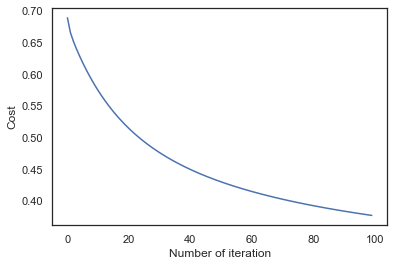

manual test accuracy: 0.85


In [30]:
logistic_regression(x_train, y_train, x_test, y_test, 1, 100)

In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train.T, y_train.T)

print("sklearn test accuracy: ", lr_model.score(x_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [9, 80]